## **Import Libraries**

In [1]:
import sys
sys.path.insert(1, '../scripts')
import extended_model
import importlib
import glob
import json
importlib.reload(extended_model)

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import bisect

import itertools
from functools import reduce
from operator import mul
from scipy.stats import norm
import random
from math import comb

import multiprocessing as mp

from tqdm import tqdm

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['font.size'] = 14

## **Observe model components one by one**

### Create belief networks

In [ ]:
G_complete = extended_model.complete_belief_network(n_nodes=3, edge_values="default")
G_ER = extended_model.gnp_belief_network(n_nodes=3, prob=.3, seed=89)

In [ ]:
gradient_colors = extended_model.weight_gradient_color_matching(n=3, c1='red', c2='blue')

for _ in [G_complete, G_ER]:
    extended_model.add_colors_to_edges(_, gradient_colors)

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(8,4))

for i, g in zip([0,1], [G_complete, G_ER]):
    nx.draw_networkx(g, 
                    ax=axs[i], 
                    edge_color=[g.edges[e]['color'] for e in g.edges()],
                    width=[abs(g.edges[e]['belief'])*10 for e in g.edges()])


### Internal energy of individual i’s belief network:

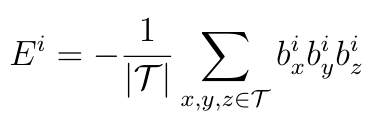

In [ ]:
triads = extended_model.find_triads(G_complete)
triads

In [ ]:
extended_model.triad_energy(G_complete, triads[0], weight_key="belief")

In [ ]:
extended_model.internal_energy(G_complete)

### Derivative of triad energy
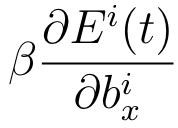

In [ ]:
triads = extended_model.find_triads(G_complete)
triad = triads[0]
focal_edge = (0,1)
extended_model.derivative_triad_energy(G_complete, triad=triad, focal_edge=focal_edge)

### Derivative of internal energy

In [ ]:
focal_edge = (0,1)
extended_model.derivative_internal_energy(G_complete, focal_edge)

### Create a network of agents 

In [ ]:
# Community social network
N = 100
mu = .1
M = 1000
seed = 89
#G, comm1, comm2 = extended_model.community_social_network(N=N, mu=mu, M=M, seed=seed)

# Erdos Renyi (random) Graph
p = .2
G = nx.gnp_random_graph(n=N, p=p, seed=seed)

In [ ]:
nx.draw_networkx(G)

### Embed belief networks

In [ ]:
n_nodes = 3
belief_network_dict = {i:{'belief_network':extended_model.complete_belief_network(n_nodes=n_nodes, edge_values="default")} for i in range(N)}
nx.set_node_attributes(G, belief_network_dict)

### Interaction

Randomly choose a sender and receiver

In [ ]:
sender, receiver, focal_edge = extended_model.choose_sender_receiver_belief(G)

The tendency of the receiver for internal coherence

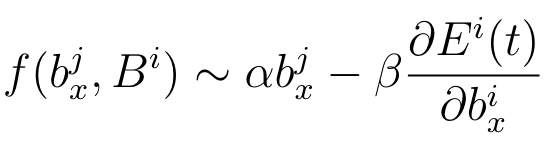

Make it stochastic

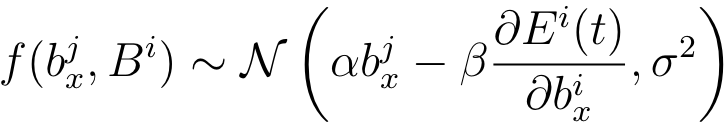

Update receiver's belief

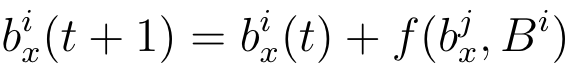

In [ ]:
print([(G.nodes[sender]['belief_network'].edges[e], e) for e in G.nodes[sender]['belief_network'].edges()])

In [ ]:
b_i_plus_1 = extended_model.calculate_updated_weight(G, sender, receiver, focal_edge, alpha=1.5, beta=1)
print([(G.nodes[receiver]['belief_network'].edges[e], e) for e in G.nodes[receiver]['belief_network'].edges()])
print(b_i_plus_1)
extended_model.embed_b_i_plus_1_to_belief_network(G, receiver, focal_edge, b_i_plus_1)
[(G.nodes[receiver]['belief_network'].edges[e], e) for e in G.nodes[receiver]['belief_network'].edges()]